# Chargement et exploration des données

In [2]:
# Étape 1.1 - Importation des librairies utiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import mlflow
import mlflow.lightgbm

# Configuration d'affichage
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [3]:
# Étape 1.2 - Chargement des datasets principaux
train = pd.read_csv("../data/raw/application_train.csv")
test = pd.read_csv("../data/raw/application_test.csv")

print(f"Shape - Train : {train.shape}")
print(f"Shape - Test  : {test.shape}")

Shape - Train : (307511, 122)
Shape - Test  : (48744, 121)


In [4]:
# Étape 1.3 - Aperçu des données
display(train.head())
display(train.info())
display(train.describe())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


None

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

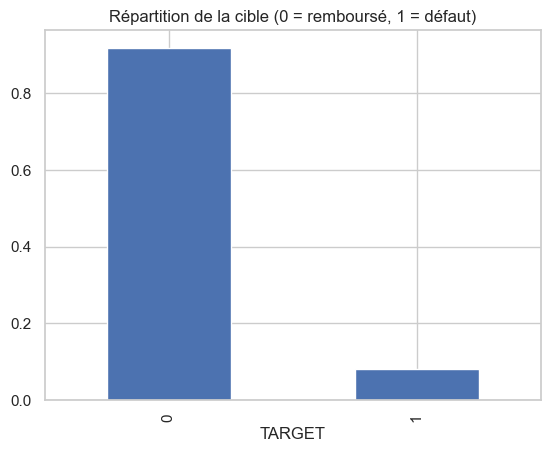

In [5]:
# Étape 1.4 - Vérification de la variable cible
train['TARGET'].value_counts(normalize=True).plot(kind='bar', title='Répartition de la cible (0 = remboursé, 1 = défaut)')
plt.show()

In [6]:
# Étape 1.5 - Chargement des autres fichiers
bureau = pd.read_csv("../data/raw/bureau.csv")
bureau_balance = pd.read_csv("../data/raw/bureau_balance.csv")
previous_application = pd.read_csv("../data/raw/previous_application.csv")
pos_cash_balance = pd.read_csv("../data/raw/POS_CASH_balance.csv")
credit_card_balance = pd.read_csv("../data/raw/credit_card_balance.csv")
installments_payments = pd.read_csv("../data/raw/installments_payments.csv")

# Vérification rapide de leur contenu
for name, df in {
    "bureau": bureau,
    "bureau_balance": bureau_balance,
    "previous_application": previous_application,
    "pos_cash_balance": pos_cash_balance,
    "credit_card_balance": credit_card_balance,
    "installments_payments": installments_payments
}.items():
    print(f"{name} shape: {df.shape}")

bureau shape: (1716428, 17)
bureau_balance shape: (27299925, 3)
previous_application shape: (1670214, 37)
pos_cash_balance shape: (10001358, 8)
credit_card_balance shape: (3840312, 23)
installments_payments shape: (13605401, 8)


In [7]:
# Étape 1.6 - Chargement du dictionnaire de variables
desc = pd.read_csv("../data/raw/HomeCredit_columns_description.csv", encoding='latin-1')
display(desc.head())

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


# Préparation des données à la modélisation

In [9]:
# Étape 2.1 - Nettoyage initial : suppression des doublons
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [10]:
# Étape 2.2 - Analyse des valeurs manquantes
missing_values = train.isnull().sum()
missing_percent = (missing_values / train.shape[0]) * 100
missing_df = pd.DataFrame({'missing_values': missing_values, 'missing_percent': missing_percent})
missing_df = missing_df[missing_df['missing_values'] > 0].sort_values(by='missing_percent', ascending=False)

display(missing_df.head(20))

,missing_values,missing_percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [11]:
# Étape 2.3 - Suppression des colonnes avec plus de 40% de valeurs manquantes
cols_to_drop = missing_df[missing_df['missing_percent'] > 40].index.tolist()
train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True)

In [12]:
# Étape 2.4 - Conversion des types catégoriels
categorical_cols = train.select_dtypes(include='object').columns.tolist()
print(f"Nombre de colonnes catégorielles : {len(categorical_cols)}")

# Optionnel : remplacement des chaînes par des labels temporaires
for col in categorical_cols:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

Nombre de colonnes catégorielles : 12


In [13]:
# Étape 2.5 - Encodage simple pour les colonnes catégorielles
# On encode uniquement les colonnes présentes dans les deux datasets
for col in categorical_cols:
    if col in test.columns:
        train[col], uniques = train[col].factorize()
        test[col] = pd.Categorical(test[col], categories=uniques).codes

In [14]:
# Étape 2.6 - Vérification des colonnes communes
common_cols = list(set(train.columns) & set(test.columns))
common_cols.remove("TARGET") if "TARGET" in common_cols else None
print(f"Nombre de colonnes communes : {len(common_cols)}")

Nombre de colonnes communes : 72


In [15]:
# Étape 2.7 - Préparation des features et de la cible
X = train[common_cols].copy()
y = train["TARGET"].copy()

In [16]:
# Étape 2.8 - Sauvegarde des datasets pré-traités (optionnel, pour les scripts API plus tard)
X.to_csv("../data/processed/X_train.csv", index=False)
y.to_csv("../data/processed/y_train.csv", index=False)
test[common_cols].to_csv("../data/processed/X_test.csv", index=False)

# Fusion et enrichissement des données

In [18]:
# Étape 3.1 - Fonction d'agrégation générique
def aggregate_and_merge(df, group_var, prefix, main_df):
    # Sélection des colonnes numériques uniquement
    numeric_df = df.select_dtypes(include=['number'])
    numeric_df[group_var] = df[group_var]  # Reajout de la clé de groupement
    agg = numeric_df.groupby(group_var).agg(['mean', 'min', 'max', 'sum', 'var'])
    agg.columns = [f"{prefix}_{col[0]}_{col[1]}" for col in agg.columns]
    agg.reset_index(inplace=True)
    return main_df.merge(agg, how='left', on=group_var)

In [19]:
# Étape 3.2 - Ajout d'informations de bureau
bureau = pd.read_csv("../data/raw/bureau.csv")
train = aggregate_and_merge(bureau, 'SK_ID_CURR', 'bureau', train)
test = aggregate_and_merge(bureau, 'SK_ID_CURR', 'bureau', test)

In [20]:
# Étape 3.3 - Ajout des informations des demandes précédentes
previous_application = pd.read_csv("../data/raw/previous_application.csv")
train = aggregate_and_merge(previous_application, 'SK_ID_CURR', 'prevapp', train)
test = aggregate_and_merge(previous_application, 'SK_ID_CURR', 'prevapp', test)

In [21]:
# Étape 3.4 - Nettoyage post-fusion : suppression des colonnes à trop de NaN générés
def clean_after_merge(df, threshold=40):
    na_ratio = df.isna().sum() * 100 / len(df)
    cols_to_drop = na_ratio[na_ratio > threshold].index
    return df.drop(columns=cols_to_drop)

train = clean_after_merge(train)
test = clean_after_merge(test)

In [22]:
# Étape 3.5 - Mise à jour des features après fusion
target = train["TARGET"]
train.drop(columns=["TARGET"], inplace=True)

common_cols = list(set(train.columns) & set(test.columns))
X = train[common_cols].copy()
y = target.copy()

In [23]:
# Étape 3.6 - Sauvegarde des nouvelles versions enrichies
X.to_csv("../data/processed/X_train_enriched.csv", index=False)
y.to_csv("../data/processed/y_train_enriched.csv", index=False)
test[common_cols].to_csv("../data/processed/X_test_enriched.csv", index=False)

# Rééquilibrage des classes avec SMOTE

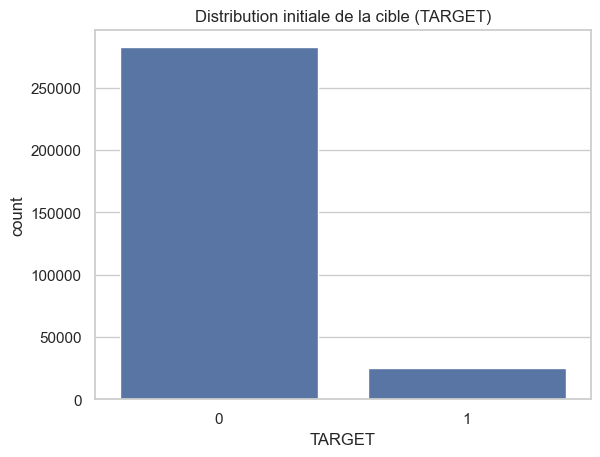

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


In [25]:
# Étape 4.1 - Vérification du déséquilibre initial
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Distribution initiale de la cible (TARGET)")
plt.show()

print(y.value_counts(normalize=True))

In [26]:
# Étape 4.2 - Split train/validation
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [27]:
# Étape 4.3 - Prétraitement : gestion des valeurs manquantes
from sklearn.impute import SimpleImputer

# Utilisation d'un imputer simple (médiane pour les valeurs numériques)
imputer = SimpleImputer(strategy="median")
X_train_imputed = imputer.fit_transform(X_train)
X_valid_imputed = imputer.transform(X_valid)


In [28]:
# Étape 4.4 - Application de SMOTE sur l'entraînement imputé
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_imputed, y_train)

print("Taille avant SMOTE :", X_train.shape)
print("Taille après SMOTE :", X_resampled.shape)
print("Répartition après SMOTE :")
print(y_resampled.value_counts(normalize=True))


C:\Users\chouh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\chouh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\chouh\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\chouh\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\chouh\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(e

Taille avant SMOTE : (246008, 218)
Taille après SMOTE : (452296, 218)
Répartition après SMOTE :
TARGET
0    0.5
1    0.5
Name: proportion, dtype: float64


In [29]:
# Étape 4.5 - Sauvegarde des jeux de données prêts pour la modélisation
import pandas as pd

# Reconstruction en DataFrame avec les mêmes colonnes
X_train_resampled = pd.DataFrame(X_resampled, columns=X.columns)
X_valid_df = pd.DataFrame(X_valid_imputed, columns=X.columns)

X_train_resampled.to_csv("../data/processed/X_train_smote.csv", index=False)
pd.Series(y_resampled).to_csv("../data/processed/y_train_smote.csv", index=False)
X_valid_df.to_csv("../data/processed/X_valid.csv", index=False)
y_valid.to_csv("../data/processed/y_valid.csv", index=False)


# Création du score métier basé sur le coût FN/FP

In [31]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score

def cost_score(y_true, y_pred, cost_fn=10, cost_fp=1):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn * cost_fn + fp * cost_fp

def predict_with_threshold(y_proba, threshold):
    return (y_proba >= threshold).astype(int)

In [32]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_resampled, y_resampled)

y_proba_lr = model_lr.predict_proba(X_valid_df)[:, 1]
y_pred_lr = predict_with_threshold(y_proba_lr, 0.5)

auc_lr = roc_auc_score(y_valid, y_proba_lr)
acc_lr = accuracy_score(y_valid, y_pred_lr)
cost_lr = cost_score(y_valid, y_pred_lr)

print("Logistic Regression")
print(f"AUC        : {auc_lr:.4f}")
print(f"Accuracy   : {acc_lr:.4f}")
print(f"Coût métier: {cost_lr}")

Logistic Regression
AUC        : 0.5622
Accuracy   : 0.4987
Coût métier: 48589


C:\Users\chouh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_resampled, y_resampled)

y_proba_rf = model_rf.predict_proba(X_valid_df)[:, 1]
y_pred_rf = predict_with_threshold(y_proba_rf, 0.5)

auc_rf = roc_auc_score(y_valid, y_proba_rf)
acc_rf = accuracy_score(y_valid, y_pred_rf)
cost_rf = cost_score(y_valid, y_pred_rf)

print("Random Forest")
print(f"AUC        : {auc_rf:.4f}")
print(f"Accuracy   : {acc_rf:.4f}")
print(f"Coût métier: {cost_rf}")

Random Forest
AUC        : 0.7051
Accuracy   : 0.9191
Coût métier: 49607


In [34]:
import lightgbm as lgb

model_lgb = lgb.LGBMClassifier(random_state=42)
model_lgb.fit(X_train_resampled, y_resampled)

y_proba_lgb = model_lgb.predict_proba(X_valid_df)[:, 1]
y_pred_lgb = predict_with_threshold(y_proba_lgb, 0.5)

auc_lgb = roc_auc_score(y_valid, y_proba_lgb)
acc_lgb = accuracy_score(y_valid, y_pred_lgb)
cost_lgb = cost_score(y_valid, y_pred_lgb)

print("LightGBM")
print(f"AUC        : {auc_lgb:.4f}")
print(f"Accuracy   : {acc_lgb:.4f}")
print(f"Coût métier: {cost_lgb}")

[LightGBM] [Info] Number of positive: 226148, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.873720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51830
[LightGBM] [Info] Number of data points in the train set: 452296, number of used features: 215
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM
AUC        : 0.7657
Accuracy   : 0.9195
Coût métier: 48960


In [35]:
import pandas as pd

results_df = pd.DataFrame([
    {"Modèle": "Logistic Regression", "AUC": auc_lr, "Accuracy": acc_lr, "Coût métier": cost_lr},
    {"Modèle": "Random Forest", "AUC": auc_rf, "Accuracy": acc_rf, "Coût métier": cost_rf},
    {"Modèle": "LightGBM", "AUC": auc_lgb, "Accuracy": acc_lgb, "Coût métier": cost_lgb}
]).sort_values(by="Accuracy", ascending=False)

display(results_df)

,Modèle,AUC,Accuracy,Coût métier
2,LightGBM,0.765661,0.919516,48960
1,Random Forest,0.705124,0.919093,49607
0,Logistic Regression,0.562193,0.498691,48589


# Optimisation du modèle LightGBM

In [37]:
import numpy as np

# Sous-échantillon raisonnable du jeu SMOTE (ex. 20 000 lignes max)
sample_idx = np.random.choice(X_train_resampled.shape[0], 20000, replace=False)
X_sampled = X_train_resampled.iloc[sample_idx]
y_sampled = y_resampled.iloc[sample_idx]

In [38]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# Grid allégé
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6],
    'learning_rate': [0.1],
    'num_leaves': [31]
}

lgb_model = lgb.LGBMClassifier(random_state=42)

grid = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=1,         # limitation CPU pour moins de charge
    verbose=1
)

grid.fit(X_sampled, y_sampled)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[LightGBM] [Info] Number of positive: 6629, number of negative: 6704
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46386
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 203
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497187 -> initscore=-0.011250
[LightGBM] [Info] Start training from score -0.011250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_jobs=1,
             param_grid={'learning_rate': [0.1], 'max_depth': [4, 6],
                         'n_estimators': [100, 200], 'num_leaves': [31]},
             scoring='roc_auc', verbose=1)

In [39]:
# Meilleurs hyperparamètres
print("Meilleurs paramètres :", grid.best_params_)

best_model = grid.best_estimator_

# Prédictions sur le vrai jeu de validation
y_valid_proba_opt = best_model.predict_proba(X_valid_df)[:, 1]

Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'num_leaves': 31}


In [40]:
from sklearn.metrics import roc_auc_score, accuracy_score

thresholds = np.arange(0.1, 0.9, 0.01)
costs = []

for t in thresholds:
    y_pred = predict_with_threshold(y_valid_proba_opt, t)
    cost = cost_score(y_valid, y_pred)
    costs.append((t, cost))

best_threshold, min_cost = min(costs, key=lambda x: x[1])
print(f"Seuil optimal : {best_threshold:.2f} → Coût métier : {min_cost}")

Seuil optimal : 0.12 → Coût métier : 34738


In [41]:
y_valid_pred_opt = predict_with_threshold(y_valid_proba_opt, best_threshold)

final_auc = roc_auc_score(y_valid, y_valid_proba_opt)
final_acc = accuracy_score(y_valid, y_valid_pred_opt)
final_cost = cost_score(y_valid, y_valid_pred_opt)

print("Évaluation finale du modèle optimisé")
print(f"AUC        : {final_auc:.4f}")
print(f"Accuracy   : {final_acc:.4f}")
print(f"Coût métier: {final_cost}")

Évaluation finale du modèle optimisé
AUC        : 0.7326
Accuracy   : 0.7011
Coût métier: 34738


In [53]:
# Réentraînement du modèle sur tout X_train_resampled avec les hyperparamètres optimaux
final_model = lgb.LGBMClassifier(**grid.best_params_, random_state=42)
final_model.fit(X_train_resampled, y_resampled)

# Prédictions sur le jeu de validation
y_valid_proba_final = final_model.predict_proba(X_valid_df)[:, 1]
y_valid_pred_final = predict_with_threshold(y_valid_proba_final, best_threshold)

# Évaluation finale
final_auc_full = roc_auc_score(y_valid, y_valid_proba_final)
final_acc_full = accuracy_score(y_valid, y_valid_pred_final)
final_cost_full = cost_score(y_valid, y_valid_pred_final)

print("Évaluation du modèle réentraîné sur l'ensemble des données")
print(f"AUC        : {final_auc_full:.4f}")
print(f"Accuracy   : {final_acc_full:.4f}")
print(f"Coût métier: {final_cost_full}")

[LightGBM] [Info] Number of positive: 226148, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.618093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51830
[LightGBM] [Info] Number of data points in the train set: 452296, number of used features: 215
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

# Analyse SHAP (feature importance globale & locale)

In [55]:
import shap

# Initialisation de l'explainer Tree pour LightGBM
explainer = shap.TreeExplainer(final_model)

# Calcul des valeurs SHAP sur X_valid_df
shap_values = explainer.shap_values(X_valid_df)

C:\Users\chouh\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\chouh\anaconda3\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


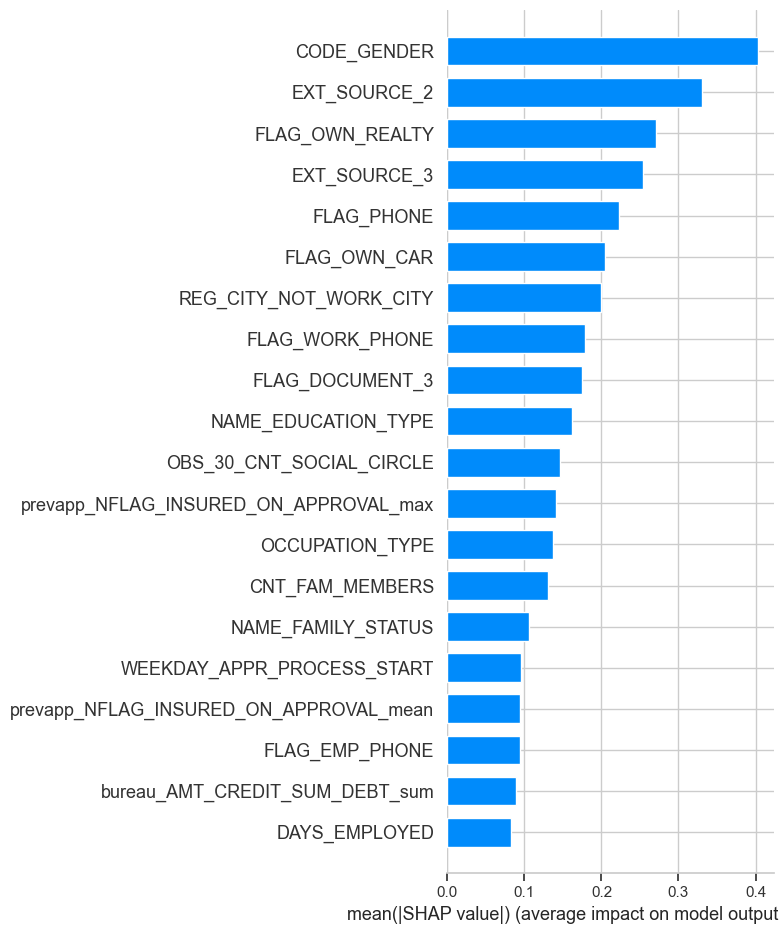

In [57]:
# Affichage de l'importance des variables
shap.summary_plot(shap_values, X_valid_df, plot_type="bar")

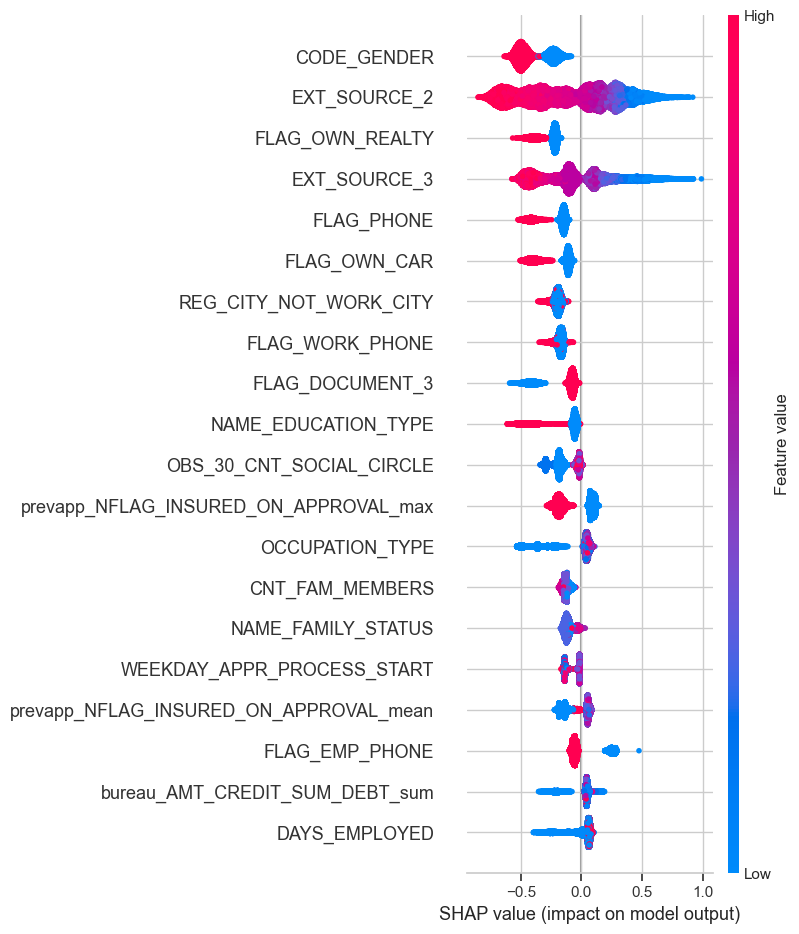

In [59]:
# Résumé détaillé (dispersions par feature)
shap.summary_plot(shap_values, X_valid_df)

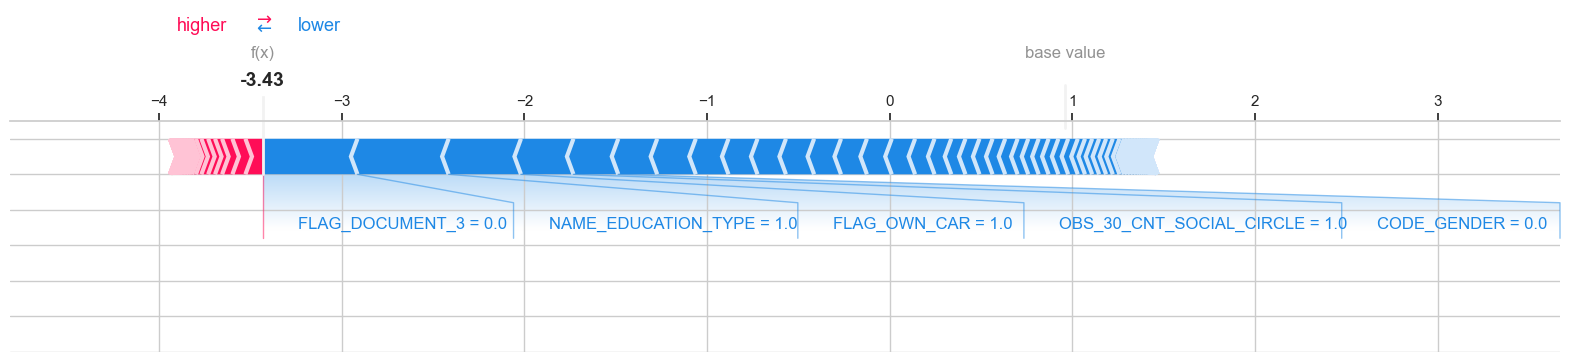

In [61]:
# Exemple : explication du premier client de l’échantillon
i = 0  # ou un index spécifique de client
shap.force_plot(
    explainer.expected_value,
    shap_values[i, :],
    X_valid_df.iloc[i, :],
    matplotlib=True
)

In [63]:
# Moyenne absolue des valeurs SHAP
import numpy as np
shap_importance = np.abs(shap_values).mean(axis=0)

# Création d’un DataFrame trié
shap_df = pd.DataFrame({
    'feature': X_valid_df.columns,
    'importance': shap_importance
}).sort_values(by='importance', ascending=False)

# Affichage des top 20 features
top_features = shap_df.head(15)['feature'].tolist()
display(shap_df.head(15))


,feature,importance
95,CODE_GENDER,0.403821
82,EXT_SOURCE_2,0.330272
37,FLAG_OWN_REALTY,0.270958
124,EXT_SOURCE_3,0.254213
89,FLAG_PHONE,0.222475
96,FLAG_OWN_CAR,0.205197
30,REG_CITY_NOT_WORK_CITY,0.199645
80,FLAG_WORK_PHONE,0.178258
206,FLAG_DOCUMENT_3,0.174676
78,NAME_EDUCATION_TYPE,0.162352


In [ ]:
#import json

#with open("../models/top_features.json", "w") as f:
#    json.dump(top_features, f)

# LightGBM avec uniquement les 15 top features SHAP (comparaison)

In [65]:
# Étape X - Réentraîner un LightGBM avec les 15 variables les plus importantes

# 1. Liste des 15 top features selon l’analyse SHAP
top_features = [
    'CODE_GENDER', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_OWN_REALTY', 
    'FLAG_PHONE', 'NAME_FAMILY_STATUS', 'FLAG_DOCUMENT_3', 'REG_CITY_NOT_WORK_CITY',
    'FLAG_OWN_CAR', 'NAME_EDUCATION_TYPE', 'REGION_RATING_CLIENT_W_CITY',
    'FLAG_WORK_PHONE', 'CNT_CHILDREN', 'prevapp_NFLAG_INSURED_ON_APPROVAL_max',
    'OCCUPATION_TYPE'
]

# 2. Sélection des variables sur X_train et X_valid
X_train_top = X_train_resampled[top_features]
X_valid_top = X_valid_df[top_features]

# 3. Entraînement LightGBM
model_lgb_top = lgb.LGBMClassifier(random_state=42)
model_lgb_top.fit(X_train_top, y_resampled)

# 4. Prédictions
y_proba_top = model_lgb_top.predict_proba(X_valid_top)[:, 1]
y_pred_top = predict_with_threshold(y_proba_top, threshold=0.5)

# 5. Évaluation
auc_top = roc_auc_score(y_valid, y_proba_top)
acc_top = accuracy_score(y_valid, y_pred_top)
cost_top = cost_score(y_valid, y_pred_top)

print("LightGBM (15 features)")
print(f"AUC        : {auc_top:.4f}")
print(f"Accuracy   : {acc_top:.4f}")
print(f"Coût métier: {cost_top}")

[LightGBM] [Info] Number of positive: 226148, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 452296, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM (15 features)
AUC        : 0.7327
Accuracy   : 0.9193
Coût métier: 49398


In [67]:
from sklearn.model_selection import GridSearchCV

# Grid de recherche
param_grid_top = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [15, 31]
}

# Déclaration du modèle
model_base_top = lgb.LGBMClassifier(random_state=42)

# GridSearch
grid_top = GridSearchCV(
    estimator=model_base_top,
    param_grid=param_grid_top,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Entraînement sur les 15 variables
grid_top.fit(X_train_top, y_resampled)

# Meilleur modèle
best_model_top = grid_top.best_estimator_

# Prédictions sur validation
y_proba_best = best_model_top.predict_proba(X_valid_top)[:, 1]
y_pred_best = predict_with_threshold(y_proba_best, threshold=0.5)

# Évaluation
auc_best = roc_auc_score(y_valid, y_proba_best)
acc_best = accuracy_score(y_valid, y_pred_best)
cost_best = cost_score(y_valid, y_pred_best)

print("LightGBM optimisé (15 features)")
print("Best params :", grid_top.best_params_)
print(f"AUC        : {auc_best:.4f}")
print(f"Accuracy   : {acc_best:.4f}")
print(f"Coût métier: {cost_best}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Info] Number of positive: 226148, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 452296, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM optimisé (15 features)
Best params : {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100, 'num_leaves': 15}
AUC        : 0.7197
Accuracy   : 0.9193
Coût métier: 49650


# Export des artefacts pour l’API et l’interface

In [69]:
import joblib
joblib.dump(final_model, "../models/model_final.pkl")

# Facultatif : sauvegarder les features utilisées
with open("../models/features_final.txt", "w") as f:
    f.write("\n".join(top_features))

In [71]:
joblib.dump(imputer, "../models/preprocessor.pkl")

['../models/preprocessor.pkl']

In [73]:
# Baseline = ligne "moyenne" (médiane pour les variables numériques) du X_train initial
baseline_row = X.median(numeric_only=True).to_dict()

# On garde uniquement les features utilisées par le modèle
baseline_row_filtered = {col: baseline_row[col] for col in X.columns}

# Sauvegarde en JSON
import json
with open("../models/baseline_row.json", "w") as f:
    json.dump(baseline_row_filtered, f)

In [75]:
with open("../models/top_features.json", "w") as f:
    json.dump(top_features, f)

In [81]:
import mlflow
import mlflow.lightgbm

# 🧹 Sécurité anti-bug notebook
while mlflow.active_run():
    mlflow.end_run()

mlflow.set_tracking_uri("file:///C:/Users/chouh/Ouhabi_Chadi_n°7_Implémentez_un_modèle_de_scoring_052025/mlruns")
mlflow.set_experiment("Credit_Scoring")

with mlflow.start_run(run_name="Final_LightGBM"):
    mlflow.log_params(grid.best_params_)
    mlflow.log_param("threshold", best_threshold)
    mlflow.log_metric("AUC", final_auc_full)
    mlflow.log_metric("Accuracy", final_acc_full)
    mlflow.log_metric("Cost_métier", final_cost_full)
    mlflow.lightgbm.log_model(final_model, artifact_path="model")

print("✅ MLflow run terminé et enregistré localement.")

2025/06/03 20:08:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ MLflow run terminé et enregistré localement.
